In [1]:
from astropy.io import fits
import reproject

In [2]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [3]:
files_466 = [
fits.open(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_nrca_destarred6.fits'),
fits.open(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_nrcb_destarred6.fits'),
]
files_405 = [
fits.open(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_nrca_destarred6.fits'),
fits.open(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_nrcb_destarred6.fits'),
]

In [4]:
weights_466 = [
    fits.open(f'{basepath}F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrca_i2d.fits')[('WHT', 1)],
    fits.open(f'{basepath}F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrcb_i2d.fits')[('WHT', 1)],
]
weights_405 = [
    fits.open(f'{basepath}F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrca_i2d.fits')[('WHT', 1)],
    fits.open(f'{basepath}F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrcb_i2d.fits')[('WHT', 1)],
]

In [5]:
from reproject.mosaicking import find_optimal_celestial_wcs, reproject_and_coadd

In [6]:

target_wcs, target_shape = find_optimal_celestial_wcs(files_466)
merged_466, weights = reproject_and_coadd(files_466, output_projection=target_wcs,
                                          input_weights=weights_466,
                                          shape_out=target_shape, reproject_function=reproject.reproject_interp)
(fits.PrimaryHDU(data=merged_466,
                 header=target_wcs.to_header())
 .writeto(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_merged_destarred6.fits', overwrite=True)
)

Set OBSGEO-B to   -20.633936 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526083300.815 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.644641 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526209006.388 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.633936 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526083300.815 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.644641 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526209006.388 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [7]:

target_wcs, target_shape = find_optimal_celestial_wcs(files_405)
merged_405, weights = reproject_and_coadd(files_405, output_projection=target_wcs,
                                          input_weights=weights_405,
                                          shape_out=target_shape, reproject_function=reproject.reproject_interp)
(fits.PrimaryHDU(data=merged_405,
                 header=target_wcs.to_header())
 .writeto(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_merged_destarred6.fits', overwrite=True)
)

Set OBSGEO-B to   -20.633936 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526083300.815 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.644641 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526209006.388 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.633936 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526083300.815 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.644641 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526209006.388 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [8]:
import pyavm
import numpy as np
import PIL
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
import pylab as pl
from astropy.visualization import simple_norm

In [9]:
rgb = np.array(
      [
       #fits.getdata(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_nrcb.fits'),
       #fits.getdata(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_nrcb.fits'),
       fits.getdata(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_merged_destarred6.fits'),
       fits.getdata(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_merged_destarred6.fits'),
       #fits.getdata(f'{basepath}/images/F410_minus_F405_nrcb.fits')
      ]
).swapaxes(0,2).swapaxes(0,1)
#for layer in (0,1,2):
#    # desaturate stars (though this will whiten the edges!)
#    rgb[:,:,layer][np.isnan(rgb[:,:,layer])] = np.nanmax(rgb[:,:,layer])
#    rgb[:,:,layer][rgb[:,:,layer] == 0] = np.nanmax(rgb[:,:,layer])

In [10]:
AVM = pyavm.AVM.from_header(fits.getheader(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_merged_destarred6.fits'))
# AVM = pyavm.AVM.from_header(fits.getheader(f'{basepath}/F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-nrcb_i2d.fits', ext=['SCI', 1]))

In [11]:
def save_rgb(img, filename, flip=-1):
    img = (img*256)
    img[img<0] = 0
    img[img>255] = 255
    img = img.astype('uint8')
    img = PIL.Image.fromarray(img[::flip,:,:])
    img.save(filename)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


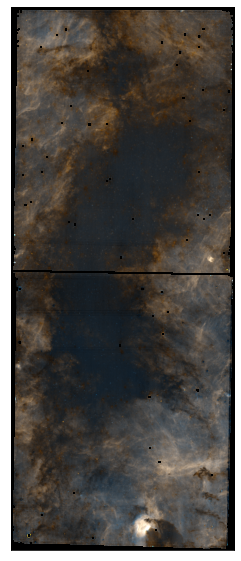

In [12]:
narrowsum = rgb[:,:,0] + rgb[:,:,1]
rgb_scaled = np.array([
                       simple_norm(rgb[:,:,0], stretch='asinh', min_cut=-1, max_cut=90)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_cut=-1, max_cut=120)(rgb[:,:,1]),
                       simple_norm(narrowsum,  stretch='asinh', min_cut=-2, max_cut=210)(narrowsum)]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += -0.35  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

outfn = f"{basepath}/images/BrickJWST_merged_longwave_narrowband_rotated.png"
save_rgb(rgb_scaled.swapaxes(0,1), outfn, flip=1)
AVM.embed(outfn, outfn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


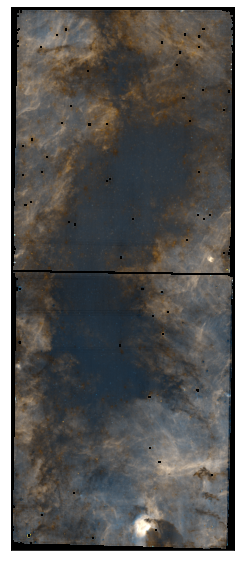

In [13]:
narrowsum = rgb[:,:,0] + rgb[:,:,1]
rgb_scaled = np.array([
                       simple_norm(rgb[:,:,0], stretch='asinh', min_cut=-2, max_cut=70)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_cut=-2, max_cut=100)(rgb[:,:,1]),
                       simple_norm(narrowsum,  stretch='asinh', min_cut=-4, max_cut=170)(narrowsum)]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += -0.35  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

outfn = f"{basepath}/images/BrickJWST_merged_longwave_narrowband_rotated_lighter.png"
save_rgb(rgb_scaled.swapaxes(0,1), outfn, flip=1)
AVM.embed(outfn, outfn)

In [ ]:
PIL.Image.open(outfn)